# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [9]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [10]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-9-104-A,103.291727,0.015836,1285.817753,0.014263,106.559510,1285.817753,168.336698,0.609653,1.890746,...,1.078675,0.121593,0.011442,1.111486,1.105911,0.117007,0.005643,PseudoVoigtModel,PseudoVoigtModel,No
1,187-9-104-B,103.383670,0.009738,1285.620363,0.008482,164.126072,1285.620363,295.455304,0.662988,1.726898,...,1.033210,0.033826,0.008079,1.068750,1.084091,0.076009,0.003793,PseudoVoigtModel,PseudoVoigtModel,No
2,187-9-104-C,103.157889,0.016808,1286.124236,0.014889,90.490036,1286.124236,126.262892,0.551955,1.768770,...,1.013304,0.006857,0.012199,1.075235,1.058394,0.062822,0.004763,PseudoVoigtModel,PseudoVoigtModel,No
3,187-9-108-B_CRR_DiadFit,103.177281,0.007500,1286.100585,0.006570,189.160604,1286.100585,258.341790,0.533673,1.613377,...,1.082938,0.058912,0.005643,1.096774,1.091139,0.090018,0.002842,PseudoVoigtModel,PseudoVoigtModel,No
4,187-9-108-D_CRR_DiadFit,103.097255,0.048847,1286.295582,0.046220,66.582775,1286.295582,93.353105,0.514042,3.360232,...,1.033937,0.086968,0.015441,1.250000,1.280864,0.218113,0.008123,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [11]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4-start-50X-r1.txt'

## Now get all the important information out of the metadata files

In [12]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 96/96 [00:05<00:00, 16.82it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start-50X-r1.txt,"July 19, 2024\n",July,19.0,6.048,45.0,5.0,50.0,"['0h', '3m', '46s']",12:57:35 PM\n,46655.0,1324.964
1,FG04-A1-4-start-50X-r2.txt,"July 19, 2024\n",July,19.0,6.055,45.0,5.0,50.0,"['0h', '3m', '47s']",1:01:51 PM\n,46911.0,1324.964
2,FG04-A1-4-start-50X-r3.txt,"July 19, 2024\n",July,19.0,6.004,45.0,5.0,50.0,"['0h', '3m', '47s']",1:09:11 PM\n,47351.0,1324.964
3,FG04-A1-4-start-100X-r1.txt,"July 19, 2024\n",July,19.0,5.994,45.0,5.0,100.0,"['0h', '3m', '47s']",1:40:02 PM\n,49202.0,1324.964
4,FG04-A1-4-start-100X-r2.txt,"July 19, 2024\n",July,19.0,5.996,45.0,5.0,100.0,"['0h', '3m', '46s']",1:44:37 PM\n,49477.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [13]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start-50X-r1'

In [14]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start-50X-r1', 'FG04-A1-4-start-50X-r2',
       'FG04-A1-4-start-50X-r3', 'FG04-A1-4-start-100X-r1',
       'FG04-A1-4-start-100X-r2', 'FG04-A1-4-start-100X-r3',
       '187-9-104-A', '187-9-104-B', '187-9-104-C', '187-9-106-A',
       '187-9-107-A', '187-9-108-A', '187-9-108-B', '187-9-108-D',
       '187-9-108-D-fordemix', '187-9-109-A', '187-9-109-B-r1',
       '187-9-109-B-r2', '187-9-110-A', '187-9-111-A-withmelt',
       '187-9-112-A', '187-9-112-B', '187-9-112-C', '187-9-112-D',
       '187-9-112-E', 'FG04-A1-4-end-50X-r4', 'FG04-A1-4-end-50X-r5',
       'FG04-A1-4-end-50X-r6', 'FG04-A1-4-end-100X-r5'], dtype=object)

## Now get filename from spectra into same form as metadata

In [15]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-9-104-A


In [16]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-9-104-A', '187-9-104-B', '187-9-104-C', '187-9-108-B',
       '187-9-108-D', '187-9-109-A', '187-9-109-B-r1', '187-9-109-B-r2',
       '187-9-110-A', '187-9-106-A', '187-9-107-A', '187-9-108-A',
       '187-9-111-A-withmelt', '187-9-112-A', '187-9-112-B',
       '187-9-112-C', '187-9-112-D', '187-9-112-E',
       'FG04-A1-4-start-50X-r1', 'FG04-A1-4-start-50X-r2',
       'FG04-A1-4-start-50X-r3', 'FG04-A1-4-start-100X-r1',
       'FG04-A1-4-start-100X-r2', 'FG04-A1-4-start-100X-r3',
       'FG04-A1-4-end-50X-r4', 'FG04-A1-4-end-50X-r5',
       'FG04-A1-4-end-50X-r6', 'FG04-A1-4-end-100X-r5',
       '21 187-9-108-D-fordemix'], dtype='<U23')

In [17]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-9-104-A,103.291727,0.015836,1285.817753,0.014263,106.559510,1285.817753,168.336698,0.609653,1.890746,...,July,19.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",2:42:43 PM\n,52963.0,1324.964
1,187-9-104-B,103.383670,0.009738,1285.620363,0.008482,164.126072,1285.620363,295.455304,0.662988,1.726898,...,July,19.0,6.010,45.0,5.0,100.0,"['0h', '3m', '46s']",2:47:48 PM\n,53268.0,1324.964
2,187-9-104-C,103.157889,0.016808,1286.124236,0.014889,90.490036,1286.124236,126.262892,0.551955,1.768770,...,July,19.0,11.961,45.0,5.0,100.0,"['0h', '3m', '46s']",3:00:57 PM\n,54057.0,1324.964
3,187-9-108-B,103.177281,0.007500,1286.100585,0.006570,189.160604,1286.100585,258.341790,0.533673,1.613377,...,July,19.0,5.991,45.0,5.0,100.0,"['0h', '3m', '46s']",3:56:34 PM\n,57394.0,1324.964
4,187-9-108-D,103.097255,0.048847,1286.295582,0.046220,66.582775,1286.295582,93.353105,0.514042,3.360232,...,July,19.0,5.991,45.0,5.0,50.0,"['0h', '3m', '46s']",4:08:44 PM\n,58124.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [18]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [19]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [20]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.786938167092285e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-9-104-A,0.130420,0.007350,0.006263,0.003848,103.079400,0.015806,0.000277,0.015836,6.010,...,NaN,NaN,NaN,NaN,NaN,NaN,52963.0,0.997944,0.997942,0.997947
1,187-9-104-B,0.166742,0.005524,0.003852,0.003959,103.171066,0.009722,0.000277,0.009738,6.010,...,NaN,NaN,NaN,NaN,NaN,NaN,53268.0,0.997944,0.997941,0.997946
2,187-9-104-C,0.077380,0.007658,0.006647,0.003804,102.945540,0.016775,0.000277,0.016808,11.961,...,NaN,NaN,NaN,NaN,NaN,NaN,54057.0,0.997942,0.997939,0.997944
3,187-9-108-B,0.084786,0.004822,0.002968,0.003801,102.964231,0.007490,0.000279,0.007500,5.991,...,NaN,NaN,NaN,NaN,NaN,NaN,57394.0,0.997935,0.997932,0.997938
4,187-9-108-D,0.053101,0.019692,0.019316,0.003832,102.884267,0.048747,0.000280,0.048847,5.991,...,NaN,NaN,NaN,NaN,NaN,NaN,58124.0,0.997934,0.997931,0.997937


In [21]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

2.786938167092285e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,187-9-104-A,0.130420,0.007350,0.006263,0.003848,103.079400,0.015806,0.000277,0.015836,6.010,...,NaN,NaN,NaN,NaN,NaN,NaN,52963.0,0.997944,0.997942,0.997947
1,187-9-104-B,0.166742,0.005524,0.003852,0.003959,103.171066,0.009722,0.000277,0.009738,6.010,...,NaN,NaN,NaN,NaN,NaN,NaN,53268.0,0.997944,0.997941,0.997946
2,187-9-104-C,0.077380,0.007658,0.006647,0.003804,102.945540,0.016775,0.000277,0.016808,11.961,...,NaN,NaN,NaN,NaN,NaN,NaN,54057.0,0.997942,0.997939,0.997944
3,187-9-108-B,0.084786,0.004822,0.002968,0.003801,102.964231,0.007490,0.000279,0.007500,5.991,...,NaN,NaN,NaN,NaN,NaN,NaN,57394.0,0.997935,0.997932,0.997938
4,187-9-108-D,0.053101,0.019692,0.019316,0.003832,102.884267,0.048747,0.000280,0.048847,5.991,...,NaN,NaN,NaN,NaN,NaN,NaN,58124.0,0.997934,0.997931,0.997937


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [22]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_July 19, 2024_fitted_2024-12-03.xlsx


## This helps visualize the errors on each spectra 

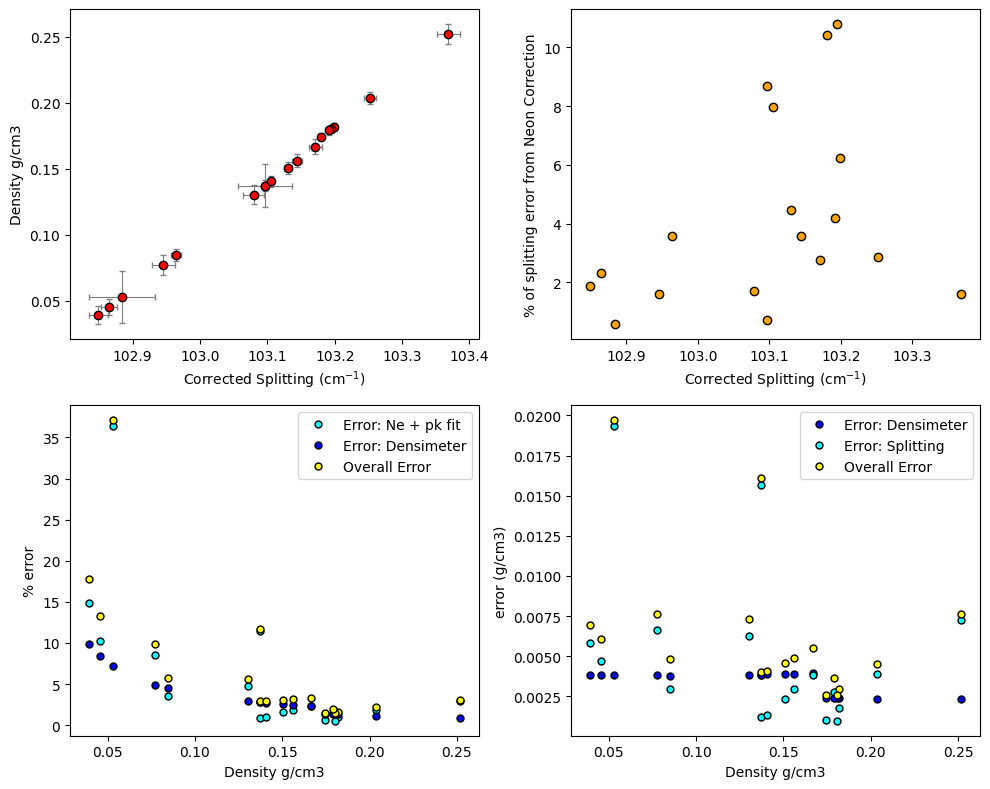

In [23]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

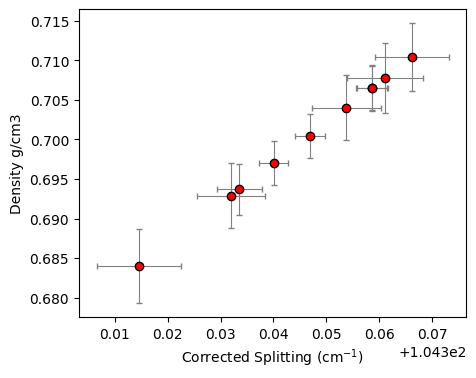

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [25]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

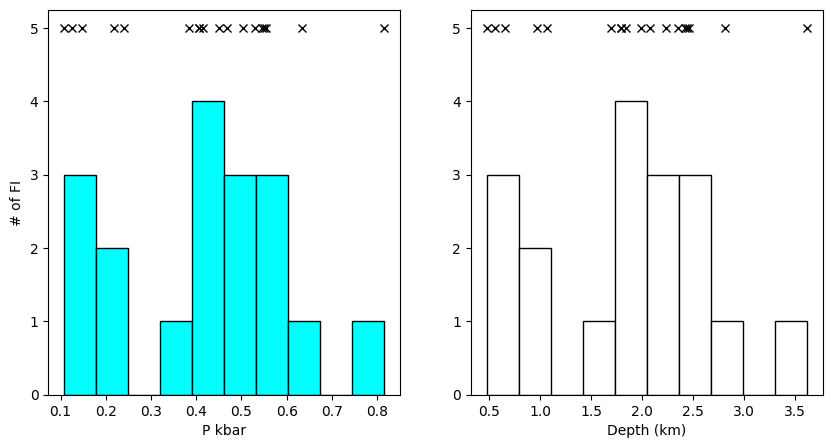

In [26]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [27]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()